# Part 1. Data Preprocessing:

In [254]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [255]:
# Reading data into dataframe
dataset = pd.read_csv("data.csv")

In [503]:
dataset.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


# Data Exploration:

In [257]:
dataset.shape

(569, 33)

In [258]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [259]:
dataset.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [260]:
len(dataset.select_dtypes(include='object').columns)

1

In [261]:
dataset.select_dtypes(include=['float64','int64']).columns

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [516]:
# Statistical Summary
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


# Working Around Missing Values:

In [263]:
dataset.isnull().values.any()

True

In [264]:
dataset.isnull().values.sum()

569

In [265]:
dataset.columns[dataset.isnull().any()]

Index(['Unnamed: 32'], dtype='object')

In [266]:
len(dataset.columns[dataset.isnull().any()])

1

In [267]:
dataset['Unnamed: 32'].count()

0

In [268]:
dataset=dataset.drop(columns='Unnamed: 32')

In [269]:
dataset.shape

(569, 32)

In [270]:
dataset.isnull().values.any()

False

# Working with Categorical Values:


In [271]:
dataset.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [272]:
dataset['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [273]:
dataset['diagnosis'].nunique()

2

In [518]:
# Mapping numerical values from categorical values
dataset=pd.get_dummies(data=dataset, drop_first=True)
dataset
# Alternatively:
# df['diagnosis'] = df['diagnosis'].map({'B':0,'M':1})

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


/Users/deep_web_love/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


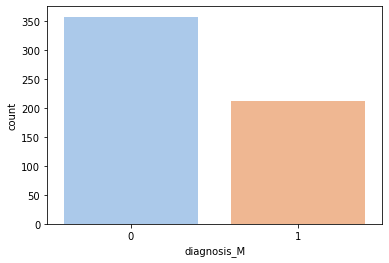

In [275]:
# Countplot
sns.countplot(dataset['diagnosis_M'], label='Count', palette='pastel')
plt.show()

In [276]:
(dataset.diagnosis_M==0).sum()

357

In [277]:
(dataset.diagnosis_M==1).sum()

212

# Correlation Matrix and Heatmap:

In [278]:
# Drop the dependent variable(diagnosis_M) 
dataset2 = dataset.drop(columns="diagnosis_M")

In [279]:
dataset2.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:title={'center':'Correlated with diagnosis_M'}>

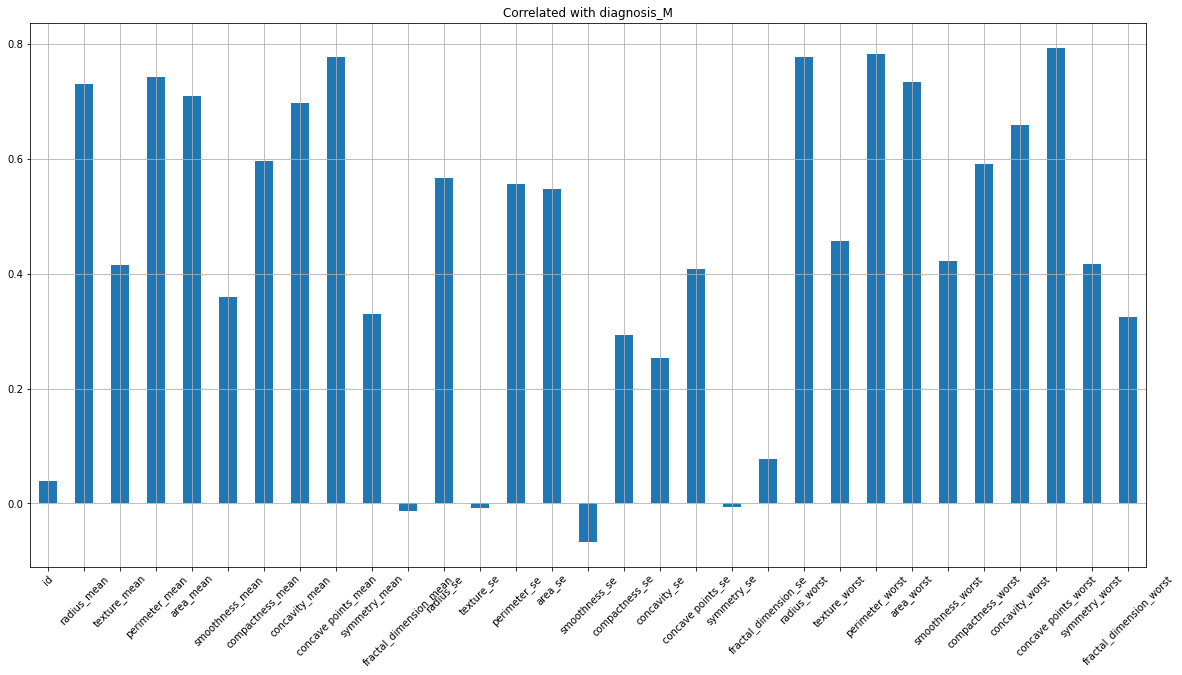

In [280]:
dataset2.corrwith(dataset['diagnosis_M']).plot.bar(figsize=(20,10), title="Correlated with diagnosis_M",
                                                   rot=45, grid=True,)

In [281]:
corr = dataset.corr()
corr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,-0.052511,0.143048,-0.007526,0.137331,0.177742,0.096781,0.033961,0.055239,0.078768,-0.017306,0.025725,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,0.039769
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499


<AxesSubplot:>

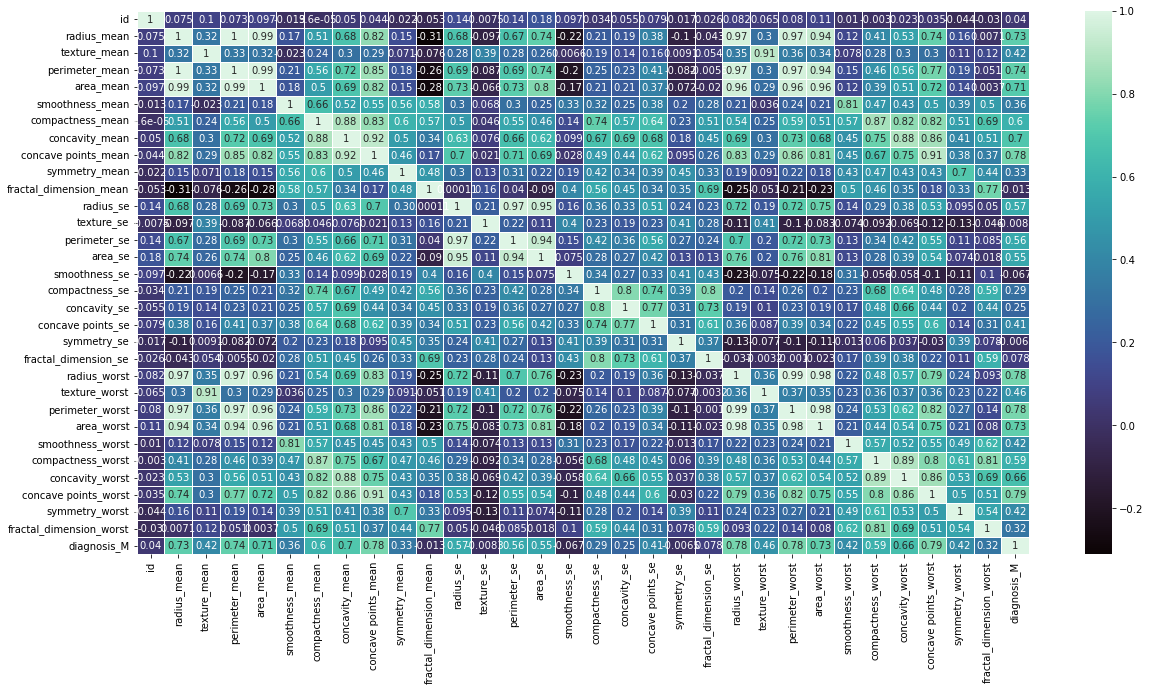

In [282]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, linewidth=0.5, cmap='mako')

# Splitting Dataset:

In [283]:
x = dataset.iloc[:,1:-1].values

In [284]:
x.shape

(569, 30)

In [285]:
# Target variable (dependant variable)

y = dataset.iloc[:,-1].values

In [286]:
y.shape

(569,)

In [287]:
from sklearn.model_selection import train_test_split

In [288]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.25, random_state=0)

In [289]:
x_train.shape

(426, 30)

In [290]:
x_test.shape

(143, 30)

In [291]:
y_train.shape

(426,)

In [292]:
y_test.shape

(143,)

# Feature Scaling:

In [293]:
from sklearn.preprocessing import StandardScaler

In [294]:
# Creating a StandardScalaer instance
sc= StandardScaler()

x_train=sc.fit_transform(x_train)
# Only training dataset gets mean and std
x_test=sc.transform(x_test)

In [295]:
x_train

array([[-0.65079907, -0.43057322, -0.68024847, ..., -0.36433881,
         0.32349851, -0.7578486 ],
       [-0.82835341,  0.15226547, -0.82773762, ..., -1.45036679,
         0.62563098, -1.03071387],
       [ 1.68277234,  2.18977235,  1.60009756, ...,  0.72504581,
        -0.51329768, -0.96601386],
       ...,
       [-1.33114223, -0.22172269, -1.3242844 , ..., -0.98806491,
        -0.69995543, -0.12266325],
       [-1.25110186, -0.24600763, -1.28700242, ..., -1.75887319,
        -1.56206114, -1.00989735],
       [-0.74662205,  1.14066273, -0.72203706, ..., -0.2860679 ,
        -1.24094654,  0.2126516 ]])

In [296]:
x_test

array([[-0.21395901,  0.3125461 , -0.14355187, ...,  1.37043754,
         1.08911166,  1.53928319],
       [-0.26750714,  1.461224  , -0.32955207, ..., -0.84266106,
        -0.71577388, -0.88105993],
       [-0.03922298, -0.86770223, -0.10463112, ..., -0.505318  ,
        -1.20298225, -0.92494342],
       ...,
       [-0.51270124, -1.69096186, -0.54095317, ..., -0.12632201,
         0.33773512, -0.42872244],
       [-0.17732081, -2.01395163, -0.17345939, ..., -0.62875108,
        -0.29500302, -0.65432858],
       [ 1.5305829 , -0.26300709,  1.57961296, ...,  1.6694843 ,
         1.18085869,  0.48889253]])

# Part 2. Building a Model:   
## Logistic Regression

In [508]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [509]:
y_pred = lr.predict(x_test)

In [510]:
# Importing metrics
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score, f1_score,precision_score

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec= recall_score(y_test, y_pred)


# Dataframe
result1 = pd.DataFrame([['Logistic Regression', acc, f1, rec, prec]],
                       columns=['Model','Accuracy','F1_score','Recall','Precision'])

In [511]:
result1

,Model,Accuracy,F1_score,Recall,Precision
0,Logistic Regression,0.958042,0.943396,0.943396,0.943396


In [512]:
cmat1 = confusion_matrix(y_test, y_pred)
cmat1

array([[87,  3],
       [ 3, 50]])

In [513]:
y_pred = lr.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",lr.score(x_train,y_train)*100)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        90
           1       0.94      0.94      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

[[87  3]
 [ 3 50]]
Training Score:  99.06103286384976


In [514]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
data

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
138,1,1
139,0,0
140,0,0
141,0,0


In [515]:
print(accuracy_score(y_test,y_pred)*100)

95.8041958041958


### Cross Validation

In [484]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier_LR, x_train, y_train, cv=10)
scores

array([1.        , 1.        , 0.97674419, 1.        , 0.93023256,
       0.95348837, 1.        , 1.        , 0.95238095, 1.        ])

In [485]:
# Accuracy significantly increased after using Cross Validation
print("Accuracy: {:.2f}% ".format(scores.mean()*100))
print("Standard Deviation: {:.2f}% ".format(scores.std()*100))

Accuracy: 98.13% 
Standard Deviation: 2.52% 


## Random Forest

In [486]:
from sklearn.ensemble import RandomForestClassifier

In [487]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [488]:
# Performance Analysis
y_pred = rfc.predict(x_test)

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score, f1_score,precision_score

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec= recall_score(y_test, y_pred)

# Dataframe
result2 = pd.DataFrame([['Random Forest', acc, f1, rec, prec]], 
                        columns=['Model','Accuracy','F1_score','Recall','Precision'])

In [489]:
result2

,Model,Accuracy,F1_score,Recall,Precision
0,Random Forest,0.972028,0.962963,0.981132,0.945455


In [490]:
results = result1.append(result2, ignore_index= True)
results

,Model,Accuracy,F1_score,Recall,Precision
0,Logistic Regression,0.958042,0.943396,0.943396,0.943396
1,Random Forest,0.972028,0.962963,0.981132,0.945455


In [491]:
cmat2 = confusion_matrix(y_test, y_pred)
cmat2

array([[87,  3],
       [ 1, 52]])

In [492]:
y_pred=rfc.predict(x_test)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",rfc.score(x_train,y_train)*100)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        90
           1       0.95      0.98      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

[[87  3]
 [ 1 52]]
Training Score:  100.0


### Cross Validation

In [493]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc, x_train, y_train, cv=10)
scores

array([0.95348837, 0.95348837, 0.93023256, 0.93023256, 0.88372093,
       0.97674419, 0.97619048, 0.92857143, 0.97619048, 0.97619048])

In [494]:
print("Accuracy: {:.2f}% ".format(scores.mean()*100))
print("Standard Deviation: {:.2f}% ".format(scores.std()*100))

Accuracy: 94.85% 
Standard Deviation: 2.90% 


## Gradient Boosting

In [495]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=0)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(random_state=0)

In [496]:
y_pred = gbc.predict(x_test)

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score, f1_score,precision_score

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec= recall_score(y_test, y_pred)

# Dataframe
result3 = pd.DataFrame([['Gradient Boost', acc, f1, rec, prec]],
                       columns=['Model','Accuracy','F1_score','Recall','Precision'])

In [497]:
result3

,Model,Accuracy,F1_score,Recall,Precision
0,Gradient Boost,0.965035,0.953271,0.962264,0.944444


In [498]:
results = results.append(result3, ignore_index= True)
results

,Model,Accuracy,F1_score,Recall,Precision
0,Logistic Regression,0.958042,0.943396,0.943396,0.943396
1,Random Forest,0.972028,0.962963,0.981132,0.945455
2,Gradient Boost,0.965035,0.953271,0.962264,0.944444


In [499]:
cmat3 = confusion_matrix(y_test, y_pred)
cmat3

array([[87,  3],
       [ 2, 51]])

In [500]:
y_pred=gbc.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",gbc.score(x_train,y_train)*100)
print(gbc.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143

[[87  3]
 [ 2 51]]
Training Score:  100.0
0.965034965034965


### Cross Validation

In [501]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gbc, x_train, y_train, cv=10)
scores

array([0.95348837, 1.        , 0.95348837, 0.95348837, 0.88372093,
       0.97674419, 0.97619048, 0.92857143, 0.97619048, 1.        ])

In [502]:
print("Accuracy: {:.2f}% ".format(scores.mean()*100))
print("Standard Deviation: {:.2f}% ".format(scores.std()*100))

Accuracy: 96.02% 
Standard Deviation: 3.31% 


# Parmeter Tunning:
## Randomized search to find best parameters ( logistic regression)

In [434]:
from sklearn.model_selection import RandomizedSearchCV

In [435]:
parameters = {'penalty':['l2', 'l1','elasticent','none'],
              'C':[0.25,0.5,0.75,1,1.25,1.5,1.75,2],
              'solver':['newton-cg','lbfgs','liblinear','sag','saga']}
parameters

{'penalty': ['l2', 'l1', 'elasticent', 'none'],
 'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

In [436]:
# these are the parameters we want to tune
# https://scikit-learn.org/stable/modules/model_evaluation.html  
# from link above you can find scoring classification
randomsearch = RandomizedSearchCV(estimator=classifier_LR, param_distributions=parameters, n_iter=10,
                                 scoring= 'roc_auc', n_jobs=-1 , cv=10, verbose=3)

In [437]:
# now we go to tune the parameters:
randomsearch.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/Users/deep_web_love/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/deep_web_love/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/deep_web_love/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/deep_web_love/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/deep_web_love/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1322: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/dee

RandomizedSearchCV(cv=10, estimator=LogisticRegression(random_state=0),
                   n_jobs=-1,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5,
                                              1.75, 2],
                                        'penalty': ['l2', 'l1', 'elasticent',
                                                    'none'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear', 'sag',
                                                   'saga']},
                   scoring='roc_auc', verbose=3)

In [441]:
# now check the optimized parameters: the 3 main parameters are: best_estimator_ , best_score_ , best_params_

randomsearch.best_params_
randomsearch.best_score_

0.993287037037037

In [442]:
randomsearch.best_estimator_

LogisticRegression(C=0.5, penalty='l1', random_state=0, solver='saga')



# Final Model (Logistic regression)


In [454]:
# we copied the lines what we did for logistic regression, but this time we do it with best parameters:
# we need to copy the result of line "randomsearch.best_estimator_" and paste inside the parantesis of LogisticRegression
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(C=0.5, penalty='l1', random_state=0, solver='saga')
lr1.fit(x_train, y_train)

/Users/deep_web_love/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(C=0.5, penalty='l1', random_state=0, solver='saga')

In [456]:
# we continue as before:  make prediction and compute accuracy and adding to table of results
y_pred = classifier.predict(x_test)

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score, f1_score,precision_score

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec= recall_score(y_test, y_pred)

# we are making a datafram
fin_result1 = pd.DataFrame([['Final Logistic Regression', acc,f1, rec, prec]],columns=['Model','Accuracy','F1_score','Recall','Precision'])
total_results = results.append(fin_result1, ignore_index= True)
total_results

# results.drop(labels=0,axis=0)

,Model,Accuracy,F1_score,Recall,Precision
0,Logistic Regression,0.958042,0.943396,0.943396,0.943396
1,Random Forest,0.972028,0.962963,0.981132,0.945455
2,Gradient Boost,0.965035,0.953271,0.962264,0.944444
3,Final Logistic Regression,0.972028,0.961538,0.943396,0.980392


In [457]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(classifier, x_train, y_train, cv=10)

print("Accuracy: {:.2f}% ".format(scores.mean()*100))
print("standard deviation: {:.2f}% ".format(scores.std()*100))

Accuracy: 98.13% 
standard deviation: 2.03% 


/Users/deep_web_love/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/deep_web_love/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/deep_web_love/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/deep_web_love/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/deep_web_love/opt/anaconda3/lib/python3.9/sit